In [604]:
from random import randint, uniform
from threading import Thread

import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt

In [605]:
MIN_FLOAT_VALUE = 0.0
MAX_FLOAT_VALUE = 25.0
MIN_FLOAT_EXPONENT = 2
MAX_FLOAT_EXPONENT = 4

DIM_RANGE = range(110, 190)

EXCEL_NAME = 'values.xlsx'

DATA_COLUMNS = ['vector_b','vector_d','vector_e','matrix_mc', 'matrix_mz', 'matrix_mm', 'matrix_mt', 'matrix_me']
RESULT_FILE = "result.txt"

FIRST_PLOT = "А=В*МС+D*MZ+E*MM"
SECOND_PLOT = "MG=min(D+E)*MM*MT-MZ*ME"

In [606]:
class LabMathConstructs:
  def vector(self, d):
    return np.array(
        [
            round(
                uniform(MIN_FLOAT_VALUE, MAX_FLOAT_VALUE), 
                randint(MIN_FLOAT_EXPONENT, MAX_FLOAT_EXPONENT)
            ) 
            for _ in range(d)
          ]
    )

  def matrix(self, d):
    matrix = np.array(
        [
            round(
                uniform(MIN_FLOAT_VALUE, MAX_FLOAT_VALUE), 
                randint(MIN_FLOAT_EXPONENT, MAX_FLOAT_EXPONENT)
            )
            for _ in range(d ** 2)
        ]
    )
    return matrix.reshape((d, d))

In [607]:
mc = LabMathConstructs()

vector_b = [mc.vector(d) for d in DIM_RANGE]
vector_d = [mc.vector(d) for d in DIM_RANGE]
vector_e = [mc.vector(d) for d in DIM_RANGE]
matrix_mc = [mc.matrix(d) for d in DIM_RANGE]
matrix_mz = [mc.matrix(d) for d in DIM_RANGE]
matrix_mm = [mc.matrix(d) for d in DIM_RANGE]
matrix_mt = [mc.matrix(d) for d in DIM_RANGE]
matrix_me = [mc.matrix(d) for d in DIM_RANGE]

df = pd.DataFrame(list(zip(vector_b, vector_d, vector_e, matrix_mc, matrix_mz, matrix_mm, matrix_mt, matrix_me)), columns=DATA_COLUMNS)
df.to_excel(EXCEL_NAME)
df.head()

,vector_b,vector_d,vector_e,matrix_mc,matrix_mz,matrix_mm,matrix_mt,matrix_me
0,"[5.0371, 14.882, 1.71, 16.0688, 23.1435, 6.641...","[21.392, 11.177, 1.05, 11.075, 19.51, 15.65, 7...","[22.7604, 14.83, 23.45, 13.568, 17.9253, 5.22,...","[[7.8156, 12.5128, 8.3161, 4.89, 1.9193, 19.74...","[[14.849, 4.14, 5.1713, 20.077, 11.87, 15.5457...","[[9.2134, 0.44, 11.117, 15.385, 9.186, 11.0, 2...","[[13.1185, 4.164, 11.982, 11.91, 19.4389, 17.6...","[[20.1953, 14.1257, 4.81, 2.9, 8.077, 22.1362,..."
1,"[9.64, 3.8392, 4.039, 22.26, 14.22, 0.91, 17.7...","[21.959, 6.76, 13.04, 1.59, 23.3, 23.098, 5.77...","[24.0962, 1.61, 4.16, 0.0878, 3.935, 23.92, 21...","[[6.61, 16.67, 18.0545, 12.552, 18.06, 17.6521...","[[0.693, 10.4122, 10.7738, 16.6209, 6.5771, 24...","[[8.558, 22.732, 6.8508, 24.4815, 16.42, 15.95...","[[21.19, 8.22, 0.8373, 20.8887, 21.49, 6.283, ...","[[20.57, 19.089, 21.201, 19.074, 11.384, 1.21,..."
2,"[8.22, 20.366, 22.012, 18.402, 22.9, 20.5182, ...","[19.6387, 20.8636, 24.962, 14.827, 24.412, 2.2...","[8.1249, 5.39, 3.998, 8.7591, 9.578, 9.5255, 1...","[[17.4, 23.56, 0.789, 16.486, 14.6345, 23.85, ...","[[23.33, 8.704, 6.2, 14.964, 14.055, 15.765, 0...","[[3.69, 13.2064, 18.217, 8.276, 11.703, 0.843,...","[[8.35, 9.93, 0.918, 6.5804, 12.205, 21.7552, ...","[[23.405, 3.992, 8.4222, 3.9316, 8.37, 4.309, ..."
3,"[17.002, 8.754, 24.871, 21.446, 22.4793, 8.030...","[4.733, 3.22, 18.93, 12.72, 0.39, 7.11, 4.172,...","[16.65, 3.918, 2.1313, 11.31, 3.8897, 5.52, 15...","[[16.77, 5.0311, 17.547, 18.3, 7.407, 24.915, ...","[[5.31, 9.001, 12.135, 23.2525, 1.097, 13.166,...","[[13.862, 15.4103, 21.6559, 15.0713, 10.582, 6...","[[6.094, 2.838, 8.101, 20.9729, 5.858, 10.4548...","[[17.2724, 23.8513, 10.04, 9.978, 19.411, 17.3..."
4,"[13.95, 8.82, 21.54, 9.55, 13.15, 1.7526, 15.5...","[8.6329, 9.448, 5.263, 0.05, 24.73, 8.288, 17....","[17.444, 8.69, 13.8353, 18.554, 18.1417, 10.83...","[[16.6515, 21.11, 6.566, 9.24, 12.0462, 3.592,...","[[23.7637, 19.7821, 4.2028, 14.05, 20.63, 9.01...","[[12.12, 0.1645, 23.91, 3.082, 20.0735, 15.223...","[[19.417, 10.156, 8.5831, 17.1866, 7.892, 21.4...","[[3.347, 22.8926, 8.457, 10.9733, 3.165, 0.33,..."


In [608]:
if (os.path.exists(RESULT_FILE)):
  os.remove(RESULT_FILE)

In [609]:
def save_result_as_file(text):
  file = open(RESULT_FILE, "a")
  file.write(f"{text}")
  file.close()

In [610]:
class FirstStatement:
  def b_dot_mc(self, b, mc):
    return np.dot(b, mc)

  def d_dot_mz(self, d, mz):
    return np.dot(d, mz)

  def e_dot_mm(self, e, mm):
    return np.dot(e, mm)

  def result_a(self, b_dot_mc, d_dot_mz, e_dot_mm):
    res = np.add(b_dot_mc, np.add(d_dot_mz, e_dot_mm))
    save_result_as_file(res)
    print(res)

In [611]:
class SecondStatement:
  def min_d_add_e(self, d, e):
    return np.amin(np.add(d, e))

  def mm_dot_mt(self, mm, mt):
    return np.dot(mm, mt)

  def mz_dot_me(self, mz, me):
    return np.dot(mz, me)

  def result_mg(self, min_d_add_e, mm_dot_mt, mz_dot_me):
    res = np.subtract(np.dot(min_d_add_e, mm_dot_mt), mz_dot_me)
    save_result_as_file(res)
    print(res)

In [612]:
class LabFirstThread:
    def __init__(self):
      self.fs = FirstStatement()
      self.first_thread_result = None
      self.second_thread_result = None
      self.third_thread_result = None

    def first_thread(self, b, mc):
        self.first_thread_result = self.fs.b_dot_mc(b, mc)

    def second_thread(self, d, mz):
        self.second_thread_result = self.fs.d_dot_mz(d, mz)

    def third_thread(self, e, mm):
        self.third_thread_result = self.fs.e_dot_mm(e, mm)

    def fourth_thread(self):
        if self.first_thread_result.all() and self.second_thread_result.all() and self.third_thread_result.all():
            self.fs.result_a(self.first_thread_result, self.second_thread_result, self.third_thread_result)

In [613]:
class LabSecondThread:
    def __init__(self):
      self.ss = SecondStatement()
      self.first_thread_result = None
      self.second_thread_result = None
      self.third_thread_result = None

    def first_thread(self, d, e):
        self.first_thread_result = self.ss.min_d_add_e(d, e)

    def second_thread(self, mm, mt):
        self.second_thread_result = self.ss.mm_dot_mt(mm, mt)

    def third_thread(self, mz, me):
        self.third_thread_result = self.ss.mz_dot_me(mz, me)

    def fourth_thread(self):
        if self.first_thread_result.all() and self.second_thread_result.all() and self.third_thread_result.all():
            self.ss.result_mg(self.first_thread_result, self.second_thread_result, self.third_thread_result)

In [614]:
class LabRuns:
  def __init__(self):
    self.xs_1_1 = []
    self.ys_1_1 = []

    self.xs_1_2 = []
    self.ys_1_2 = []

    self.xs_2_1 = []
    self.ys_2_1 = []

    self.xs_2_2 = []
    self.ys_2_2 = []

    self.starting_time = 0
    self.ending_time = 0
    self.actual_time = 0

  def start_time(self, thread_num, run_num):
      self.starting_time = time.time()
      self.print_thread_start(thread_num, run_num)

  def end_time(self):
      self.ending_time = time.time()
      self.actual_time = self.ending_time - self.starting_time

  def print_thread_start(self, thread_num, run_num):
    print(f"Start Thread #{thread_num}_{run_num}")

  def run_first_thread_first_run(self, i):
    fs = FirstStatement()

    thread = Thread(target=fs.result_a, args=[fs.b_dot_mc(vector_b[i], matrix_mc[i]), fs.d_dot_mz(vector_d[i], matrix_mz[i]), fs.e_dot_mm(vector_e[i], matrix_mm[i]),],)
    thread.start()
    thread.join()

  def run_second_thread_first_run(self, i):
    ss = SecondStatement()

    thread = Thread(target=ss.result_mg, args=[ss.min_d_add_e(vector_d[i], vector_e[i]), ss.mm_dot_mt(matrix_mm[i], matrix_mt[i]), ss.mz_dot_me(matrix_mz[i], matrix_me[i]),],)
    thread.start()
    thread.join()

  def first_run(self):
    for i in range(0, len(DIM_RANGE)):
        self.ys_1_1.append(len(vector_b[i]))
        
        self.start_time(i + 1, 1)
        self.run_first_thread_first_run(i)
        self.end_time()

        self.xs_1_1.append(self.actual_time)
        self.ys_1_2.append(len(vector_b[i]))
        
        self.start_time(i + 1, 2)
        self.run_second_thread_first_run(i)
        self.end_time()
        
        self.xs_1_2.append(self.actual_time)

  def run_first_threads_second_run(self, i):
        self.ys_2_1.append(len(vector_b[i]))

        thread = LabFirstThread()

        first_threads = []

        self.start_time(i + 1, 1)

        first_threads.append(Thread(target=thread.first_thread, args=[vector_b[i], matrix_mc[i]],))
        first_threads.append(Thread(target=thread.second_thread, args=[vector_d[i], matrix_mz[i]],))
        first_threads.append(Thread(target=thread.third_thread, args=[vector_e[i], matrix_mm[i]],))
        first_threads.append(Thread(target=thread.fourth_thread))

        for thread in first_threads:
          thread.start()
        for thread in first_threads:
          thread.join()

        self.end_time()

        self.xs_2_1.append(self.actual_time)
        self.ys_2_2.append(len(vector_b[i]))

  def run_second_threads_second_run(self, i):
        thread = LabSecondThread()
        second_threads = []

        self.start_time(i + 1, 2)

        second_threads.append(Thread(target=thread.first_thread, args=[vector_d[i], vector_e[i]],))
        second_threads.append(Thread(target=thread.second_thread, args=[matrix_mm[i], matrix_mt[i]],))
        second_threads.append(Thread(target=thread.third_thread, args=[matrix_mz[i], matrix_me[i]],))
        second_threads.append(Thread(target=thread.fourth_thread))

        for thread in second_threads:
          thread.start()
        for thread in second_threads:
          thread.join()

        self.end_time()
        self.xs_2_2.append(self.actual_time)

  def second_run(self):
    for i in range(0, len(DIM_RANGE)):
        self.run_first_threads_second_run(i)
        self.run_second_threads_second_run(i)

In [615]:
runs = LabRuns()

In [616]:
runs.first_run()

Start Thread #1_1
[53416.78985401 52011.36264521 53485.38760819 50074.53395001
 53982.89090379 53589.3962574  50231.62448899 51540.81113656
 54248.36412709 54741.93046314 51837.36845402 53202.92047314
 49276.33444695 54335.20278666 52971.10871097 51493.58198508
 54820.86488912 52990.31631455 50567.0035128  50943.84989103
 51178.99087761 52235.96349467 54356.5684374  49661.41198537
 50763.80248777 52993.35843609 52214.25013647 54953.45691361
 53638.2360021  48836.68484937 53800.73260818 51280.06532706
 53892.37992717 51164.29884745 53123.97064822 52063.80198501
 50251.39444774 51829.53572433 51206.04067945 51829.08933319
 50257.67207194 52320.74933811 52334.89658376 54775.40053734
 54427.29577928 54263.04565982 54065.18083218 49104.1058259
 54136.29344851 53773.4026334  50188.11424126 52183.19454424
 50448.78713773 50338.61464722 51733.13621175 50240.65991754
 52064.35090165 50899.95876833 52445.25433102 53148.1624058
 52770.68586304 53739.35449856 51330.13127734 51990.97218175
 55673.5

In [617]:
runs.second_run()

Start Thread #1_1
[53416.78985401 52011.36264521 53485.38760819 50074.53395001
 53982.89090379 53589.3962574  50231.62448899 51540.81113656
 54248.36412709 54741.93046314 51837.36845402 53202.92047314
 49276.33444695 54335.20278666 52971.10871097 51493.58198508
 54820.86488912 52990.31631455 50567.0035128  50943.84989103
 51178.99087761 52235.96349467 54356.5684374  49661.41198537
 50763.80248777 52993.35843609 52214.25013647 54953.45691361
 53638.2360021  48836.68484937 53800.73260818 51280.06532706
 53892.37992717 51164.29884745 53123.97064822 52063.80198501
 50251.39444774 51829.53572433 51206.04067945 51829.08933319
 50257.67207194 52320.74933811 52334.89658376 54775.40053734
 54427.29577928 54263.04565982 54065.18083218 49104.1058259
 54136.29344851 53773.4026334  50188.11424126 52183.19454424
 50448.78713773 50338.61464722 51733.13621175 50240.65991754
 52064.35090165 50899.95876833 52445.25433102 53148.1624058
 52770.68586304 53739.35449856 51330.13127734 51990.97218175
 55673.5

Exception in thread Thread-33194:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-612-14e46c7e8ed5>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


[[-6074.07230128 -4519.43641669 -2269.15525582 ... -2562.9755495
  -1459.0454028  -2566.06278029]
 [-8957.16360607 -6297.74214522 -5212.01802272 ... -4888.0206088
  -5074.86062247 -5143.76987162]
 [-7048.55210415 -5114.29497282 -3466.34712498 ... -3204.78552926
  -2943.01824482 -2864.72983352]
 ...
 [-5704.44170634 -3874.14310275 -3396.86053513 ... -3568.37881309
  -1603.2242164  -3292.92837073]
 [-6280.86582214 -7383.01589973 -4807.81498148 ... -5282.64122751
  -2812.97921221 -6276.28555979]
 [-7684.90680373 -6205.22489601 -5501.75045082 ... -3771.925055
  -2717.60287921 -5640.46038937]]
Start Thread #7_1
Start Thread #7_2
[[6516.80124848 3782.76905324 6235.20833535 ... 5196.98728495
  2606.01063656 4507.79960143]
 [7023.66414143 1692.03582625 3765.12948345 ... 2903.18825057
  2838.01706169 4594.40842184]
 [3937.71971733  445.64430457 3806.20928608 ... 2591.79687124
  1703.12323725 1814.06154284]
 ...
 [7575.44026176 5764.71470621 4282.20160803 ... 4474.5250302
  3598.32372575 6362.27

Exception in thread Thread-33286:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-613-b9481e91d6b3>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-33290:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-612-14e46c7e8ed5>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


Start Thread #19_1
Start Thread #19_2
[[44651.77827554 48518.76018009 49099.49608931 ... 50065.03648658
  50298.87872034 52447.81142389]
 [44606.99517671 44176.32919481 47383.04311477 ... 44835.44781372
  52810.53059206 43163.35587762]
 [56101.79179071 62119.31482459 62771.69557581 ... 62095.13547566
  65286.84357608 61258.4104858 ]
 ...
 [55478.70947413 50513.76860128 53048.33437367 ... 57764.26309977
  59750.18594163 52898.29370506]
 [44200.92713745 46774.93063913 43413.04764683 ... 48663.11640987
  49008.2087018  51279.56676912]
 [47539.51875865 51571.42144896 51926.97256267 ... 49765.70850084
  50519.94995486 49199.80713412]]
Start Thread #20_1
[61569.05243883 60114.69079912 63765.0560559  63126.69012997
 62107.50755588 62198.64416501 62385.80337675 60773.28503718
 62454.63770751 64762.90292742 64874.71420282 64194.45017828
 59439.57936087 61486.2676447  62891.90231018 60901.80824157
 63970.18872151 63511.83794832 67152.79567819 62168.42238665
 61878.90114446 63603.28935519 59676.7

Exception in thread Thread-33466:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-612-14e46c7e8ed5>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


[[ 76462.84145009  90467.02985118  80954.46118382 ...  81458.60475606
   85175.37384584  86450.88462693]
 [ 83549.34057359  98186.57345875  90819.52961739 ...  92383.94132046
   92621.50959762  90826.33905929]
 [ 77956.43410956  91749.19522497  78565.97981956 ...  77137.45139619
   82194.15421171  84766.14201871]
 ...
 [ 80219.84901     88922.03482798  80263.35502026 ...  78184.67589958
   76275.32879672  83713.43868523]
 [ 76853.46015938  87481.26488048  83757.7967219  ...  81569.37471079
   78591.36962894  84465.31892777]
 [ 94568.07076206 111015.6369006   93676.40318482 ...  92023.67371059
   95495.75916694  98376.48440875]]
Start Thread #41_1
Start Thread #41_2
[[76698.06287901 71494.8783136  83541.29993061 ... 81149.35154911
  95345.42175071 80638.77390018]
 [87352.34890839 70915.18405037 88120.28478675 ... 82680.73368214
  96491.50003115 86800.37144351]
 [83707.68380991 77161.99722428 93428.96556123 ... 87780.90533397
  92148.06351256 87595.31484069]
 ...
 [76802.85897298 74993.8

Exception in thread Thread-33550:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-613-b9481e91d6b3>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


Start Thread #48_1
[69478.22027335 75916.00839881 75327.74623116 77560.38552856
 79333.59388733 71522.23741472 73277.33853014 75764.87275549
 69529.1692297  74210.40985165 77062.16621996 75668.57259519
 74801.20438312 73592.96267557 70413.83305983 72039.2636765
 75047.21401918 75183.92659652 80281.7697497  76696.1288809
 69359.03625752 74164.08641125 76169.57124309 72634.96605599
 79961.18192795 72764.10239236 72572.93134106 72123.01248066
 78227.63110258 76732.3371165  77409.26598894 73218.4404723
 73740.58238977 70622.50509261 74536.15013386 73805.03737437
 78606.41546093 74698.30106426 75003.93224791 74489.65269836
 72718.6337384  74743.51595608 72903.41901953 69485.52644064
 71986.83606405 75069.49930991 73526.75654743 71929.68639449
 71111.16462724 71009.48130101 74845.12282813 74432.20895665
 76868.43744144 74233.84445052 75893.59720792 72990.35872457
 74723.21317836 73891.32815359 72114.61710095 71640.44535642
 72167.44554093 75331.52086347 73262.64506887 73995.48951018
 72959.0

Exception in thread Thread-33562:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-612-14e46c7e8ed5>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-33566:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-613-b9481e91d6b3>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


Start Thread #53_1
Start Thread #53_2
Start Thread #54_1
[75205.68077563 75101.25428653 76680.53621821 74655.85732146
 72901.22158305 77188.90651409 78673.03864374 74356.22338936
 71699.67644038 75795.60946159 76876.49955402 76841.54137966
 76830.11536578 76957.72628331 76824.33940166 75085.42644599
 76606.87780332 76396.25168935 72010.36677688 75155.15563134
 77105.94546778 74686.45241057 75434.30527642 76369.77682949
 73637.43245829 69908.22810335 76699.02851065 75210.90848106
 79688.98583665 76061.75039224 78803.84847514 76538.57607406
 75987.09733568 73655.38271841 77432.2392877  74318.48409217
 74384.13802245 73227.63263585 78795.96467216 76759.87634137
 74049.79479353 76755.92716583 75560.48511928 81344.9214216
 73665.84485865 72567.73064199 79009.52727276 79193.93179891
 80241.61330534 76067.29391946 75161.48011729 77806.80499031
 78206.4354924  79815.44007902 72990.90081386 81011.06400262
 73531.36787543 76642.02757923 78590.23511263 77201.50793674
 77034.30243811 78488.93691  

Exception in thread Thread-33598:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-613-b9481e91d6b3>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-33618:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-612-14e46c7e8ed5>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


Start Thread #58_1
[75301.36147959 79512.11004876 76456.77764984 75441.79978575
 83123.07152162 83140.52622239 82090.48834276 78295.05831332
 78679.95243563 81662.26162706 78988.09637052 80450.18501591
 73224.57875941 82555.54269722 78153.54534635 80848.77084836
 81746.6038634  79578.22101631 80310.82079846 79274.66683154
 78171.27925379 78903.93900021 78098.37369909 80327.52024826
 80533.02854304 80868.87684531 78975.95789535 77877.00202227
 79721.01508983 77198.06823387 77991.08365858 82425.27874771
 77879.12079599 76219.80415479 80454.1442407  75993.68525262
 81132.77858686 76613.19985581 74540.04930688 80400.49796814
 76327.94506407 81346.19685065 75885.31708912 82467.47619244
 78739.06422832 77891.64948416 80912.00033348 78037.02638797
 77244.75933439 78152.41171455 80212.7252809  80604.35622391
 77339.22460893 81075.05709925 75704.36013477 76246.29693605
 76468.29266014 75205.68561477 76846.49536777 80041.87003686
 76531.07852485 75742.42588342 79018.35146754 76808.27711814
 8026

Exception in thread Thread-33622:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-613-b9481e91d6b3>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-33638:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-613-b9481e91d6b3>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-33654:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._t

Start Thread #61_1
[82567.90902747 78693.98474832 76727.55519744 79277.88560346
 78897.74291132 78650.76698696 80251.12815226 83642.12803373
 80213.90371644 82938.48679966 81206.51208858 77670.84479106
 80079.38791943 78667.83715387 82095.12636312 81675.44143118
 79770.42554212 82197.38535329 78122.79060519 75802.256951
 83526.70640895 81995.45285439 77078.51135703 80706.69170414
 83761.63675779 84134.79407651 83333.97943865 84956.38152154
 78097.07449537 78014.77350833 77384.96703522 83556.95667781
 81011.33911267 79985.92065267 76166.59036156 76519.10796236
 79827.97955006 76611.81848777 79812.86931271 78313.62059037
 80297.54603226 81441.26111198 80094.31204183 78891.56418217
 79470.72533154 77959.24706661 78603.17696791 77717.88764053
 80149.73947925 80304.56798557 80379.06188414 82563.22001531
 84180.00698376 80827.81426638 76358.77926153 84055.73896903
 79006.32124767 80177.74697223 81542.00271864 75956.09215785
 82794.69466886 78506.69663528 78995.75330743 81950.65953623
 74810.

Exception in thread Thread-33666:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-612-14e46c7e8ed5>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


Start Thread #66_1
Start Thread #66_2
[[2688.60953     -80.21044093 4682.59402277 ... 3081.599618
  2114.30193161 3468.27550731]
 [ 791.12543654  973.86229459 2560.37895828 ...  673.21422298
  -191.82027966 2461.29616719]
 [1003.85100971 1096.89052859 5656.24203523 ...  430.23460016
  3190.76493794 4872.26114568]
 ...
 [4424.93859534 3756.13281386 6248.37432556 ... 4191.93841712
  4133.04780754 4885.75777045]
 [4695.96666469  217.35872521 6703.69424752 ... 2230.60728582
  3531.96113768 3332.78085797]
 [5091.04543266 4192.29231297 6737.61659441 ... 3893.36322427
  4299.31316472 5004.20156487]]
Start Thread #67_1
[93045.34160859 90978.41306129 88027.96124521 90383.58927325
 87655.2759504  92411.85114714 88313.07989859 88052.0537586
 88726.75402492 87980.62316583 86377.27926873 89363.79269526
 85897.06956019 93300.45183013 90820.03351929 87223.87676509
 88405.29261701 87243.33932003 90244.76682838 91442.03772088
 91247.25963836 87545.462931   90625.90724326 90105.94723781
 86229.47716725 

Exception in thread Thread-33678:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-613-b9481e91d6b3>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-33682:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-612-14e46c7e8ed5>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'
Exception in thread Thread-33686:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._t

Start Thread #68_1
Start Thread #68_2
Start Thread #69_1
[81461.85632576 82023.02301951 85887.60601043 85740.62195503
 81425.46459355 83145.2723495  85125.22361756 87549.27674233
 83037.31036539 82469.92798367 82819.15319083 82779.11037609
 82336.34053017 82320.28339595 82715.54133266 81792.15223274
 82559.36057639 84649.06933818 81967.17124295 87506.9052107
 83224.95342334 81277.39464379 84492.09684002 84933.63220399
 83490.61372643 85432.41097234 84229.37228209 85007.89534124
 82385.35727012 80441.12811609 84908.88676194 83339.96675526
 78711.9101459  79208.48325541 80853.07688481 81403.76557136
 80896.58993539 81194.66565205 82722.05524603 85059.33983675
 81762.24814218 83635.57896152 77282.38753863 81270.79230075
 88690.66662474 79406.29902923 83189.14746078 79501.93920049
 84974.45291352 79124.20146673 81253.35375363 79940.1232301
 83204.32928107 83077.30292503 82471.3672234  80595.47087907
 85233.33640319 82372.91490898 86640.10445872 83561.57963731
 79178.19009388 80204.63310489

Exception in thread Thread-33750:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-613-b9481e91d6b3>", line 18, in fourth_thread
AttributeError: 'NoneType' object has no attribute 'all'


[87964.69940054 86961.65193739 84359.0225162  84305.87575654
 88915.49765281 82712.01023377 87115.01811618 85333.73469556
 89284.6143515  82432.90063783 84545.71891394 84465.79694821
 84019.40721996 90252.65715291 85408.6945691  86466.42176842
 81437.18891497 86016.65563652 80875.26706712 90640.30684582
 88786.82658894 88767.89396485 89379.46927131 82984.6483556
 85021.35082552 84776.81653034 89204.32946151 90618.42991277
 87620.29627217 85764.32363578 86191.75208215 88649.53211247
 91028.54359652 87987.0498607  85538.69798093 87688.77889386
 87137.39175296 83769.16499949 82647.46937528 87322.47435142
 84775.40542824 87614.335811   88474.54437411 86975.15236117
 85461.44073691 82683.95318833 92126.99289774 83959.57431515
 83749.09088596 84121.63148475 89181.56549944 87317.43992271
 86421.53957047 84874.88558868 84525.27202761 85168.5322393
 90212.68170455 89306.7680501  83245.7997937  87995.7700622
 88269.24183237 86878.29707532 84662.85293517 89686.31301308
 87191.86445069 87635.25547

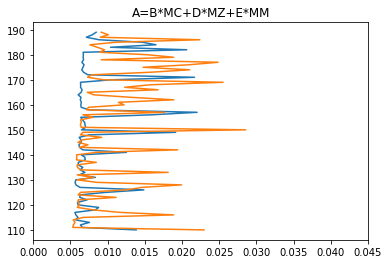

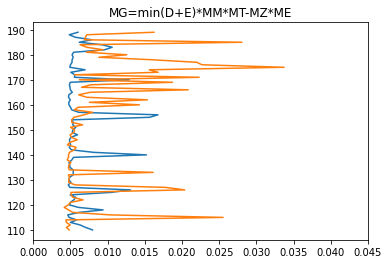

In [618]:
plt.title(FIRST_PLOT)
plt.xlim(0, 0.045)
plt.plot(runs.xs_1_1, runs.ys_1_1)
plt.plot(runs.xs_2_1, runs.ys_2_1)
plt.show()

plt.title(SECOND_PLOT)
plt.xlim(0, 0.045)
plt.plot(runs.xs_1_2, runs.ys_1_2)
plt.plot(runs.xs_2_2, runs.ys_2_2)
plt.show()